In [14]:
import os
import pandas as pd
import geopandas as gpd
import numpy as np
import glob
from datetime import datetime
import matplotlib.pyplot as plt


In [29]:
# change this folder path to your own path
folder_path = r"C:\Users\tobyc\OneDrive\Desktop\Data"

## reading csv files from folder
files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

dfs = []
for file in files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path,engine='python', error_bad_lines=False)
    dfs.append(df)

## merging all CSVs
frame = pd.concat(dfs, axis=0, ignore_index=True)
frame.head()



C:\Users\tobyc\AppData\Local\Temp\ipykernel_21564\3330811510.py:10: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(file_path,engine='python', error_bad_lines=False)
C:\Users\tobyc\AppData\Local\Temp\ipykernel_21564\3330811510.py:10: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(file_path,engine='python', error_bad_lines=False)
C:\Users\tobyc\AppData\Local\Temp\ipykernel_21564\3330811510.py:10: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(file_path,engine='python', error_bad_lines=False)
C:\Users\tobyc\AppData\Local\Temp\ipykernel_21564\3330811510.py:10: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.

C:\Users\tobyc\AppData\Local\Temp\ipykernel_21564\3330811510.py:10: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(file_path,engine='python', error_bad_lines=False)
C:\Users\tobyc\AppData\Local\Temp\ipykernel_21564\3330811510.py:10: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(file_path,engine='python', error_bad_lines=False)
C:\Users\tobyc\AppData\Local\Temp\ipykernel_21564\3330811510.py:10: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(file_path,engine='python', error_bad_lines=False)
C:\Users\tobyc\AppData\Local\Temp\ipykernel_21564\3330811510.py:10: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.

,tag_number_masked,date_of_infraction,infraction_code,infraction_description,set_fine_amount,time_of_infraction,location1,location2,location3,location4,province,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,***77243,20110101,8.0,STAND VEH HWY PRO TIMES/DAYS,60,0.0,NR,60 BRIAN HARRISON WAY,NaN,NaN,ON,NaN,NaN,NaN
1,***77244,20110101,8.0,STAND VEH HWY PRO TIMES/DAYS,60,0.0,NR,60 BRIAN HARRISON WAY,NaN,NaN,ON,NaN,NaN,NaN
2,***99464,20110101,29.0,PARK PROHIBITED TIME NO PERMIT,30,0.0,OPP,241 TORRENS AVE,NaN,NaN,ON,NaN,NaN,NaN
3,***77245,20110101,15.0,PARK 3 M OF FIRE HYDRANT,100,1.0,NR,60 BRIAN HARRISON WAY,NaN,NaN,ON,NaN,NaN,NaN
4,***99465,20110101,29.0,PARK PROHIBITED TIME NO PERMIT,30,1.0,OPP,245 TORRENS AVE,NaN,NaN,ON,NaN,NaN,NaN


In [30]:
### Feleting the last three columns
frame = frame.iloc[:, :-3]
frame.tail(100)

,tag_number_masked,date_of_infraction,infraction_code,infraction_description,set_fine_amount,time_of_infraction,location1,location2,location3,location4,province
17859977,***92053,20201231,384.0,STOP VEH OTR THN BCYCL-BYCL LN,150,1942.0,N/S,BLOOR ST W,E/O,BATHURST ST,ON
17859978,***92054,20201231,384.0,STOP VEH OTR THN BCYCL-BYCL LN,150,1943.0,N/S,BLOOR ST W,E/O,BATHURST ST,ON
17859979,***99751,20201231,9.0,STOP-SIGNED HWY-PROHIBIT TM/DY,100,1944.0,NR,7 BROADWAY AVE,NaN,NaN,ON
17859980,***29595,20201231,5.0,PARK-SIGNED HWY-PROHIBIT DY/TM,50,1944.0,NR,88 KEYWORTH TRL,NaN,NaN,ON
17859981,***92055,20201231,384.0,STOP VEH OTR THN BCYCL-BYCL LN,150,1945.0,N/S,BLOOR ST W,E/O,BATHURST ST,ON
...,...,...,...,...,...,...,...,...,...,...,...
17860072,***42841,20201231,347.0,PARK IN A FIRE ROUTE,250,2341.0,NaN,325 BOGERT AVE,NaN,NaN,ON
17860073,***18794,20201231,3.0,PARK ON PRIVATE PROPERTY,30,2351.0,AT,12 YONGE ST,NaN,NaN,ON
17860074,***36469,20201231,3.0,PARK ON PRIVATE PROPERTY,30,NaN,NaN,40 PANORAMA CT,NaN,NaN,ON
17860075,***38382,20201231,3.0,PARK ON PRIVATE PROPERTY,30,NaN,NaN,155 REDPATH AVE,NaN,NaN,ON


In [32]:
### reformating date column and separating month, day, year into different columns
frame['date_of_infraction'] = pd.to_datetime(frame['date_of_infraction'], format='%Y%m%d')
frame['year'] = frame['date_of_infraction'].dt.year
frame['month'] = frame['date_of_infraction'].dt.month
frame['day'] = frame['date_of_infraction'].dt.day
frame['month'] = frame['date_of_infraction'].dt.strftime('%B')
frame.tail()

,tag_number_masked,date_of_infraction,infraction_code,infraction_description,set_fine_amount,time_of_infraction,location1,location2,location3,location4,province,year,month,day
17860072,***42841,2020-12-31,347.0,PARK IN A FIRE ROUTE,250,2341.0,NaN,325 BOGERT AVE,NaN,NaN,ON,2020,December,31
17860073,***18794,2020-12-31,3.0,PARK ON PRIVATE PROPERTY,30,2351.0,AT,12 YONGE ST,NaN,NaN,ON,2020,December,31
17860074,***36469,2020-12-31,3.0,PARK ON PRIVATE PROPERTY,30,NaN,NaN,40 PANORAMA CT,NaN,NaN,ON,2020,December,31
17860075,***38382,2020-12-31,3.0,PARK ON PRIVATE PROPERTY,30,NaN,NaN,155 REDPATH AVE,NaN,NaN,ON,2020,December,31
17860076,***13890,2020-12-31,3.0,PARK ON PRIVATE PROPERTY,30,NaN,NaN,NaN,NaN,NaN,ON,2020,December,31


In [52]:
print('Number of Rows: ' + str(len(frame)))

Number of Rows: 17860077


In [53]:
unique_values = frame['infraction_description'].value_counts()
unique_values

PARK PROHIBITED TIME NO PERMIT    2594287
PARK-SIGNED HWY-PROHIBIT DY/TM    2457461
PARK ON PRIVATE PROPERTY          2313389
PARK MACHINE-REQD FEE NOT PAID    1191898
PARK FAIL TO DISPLAY RECEIPT      1187081
                                   ...   
PARA PARK MTD SPACE WHEELS OUT          1
STOP FROM EXCAV RD IMPEDE TRAF          1
PARK 15M OF LEVEL RAILWY CRSNG          1
FAIL PARK/STOP PAR CURB LF SID          1
STOP - IN TUNNEL                        1
Name: infraction_description, Length: 507, dtype: int64

In [123]:
unique_values2 = frame['location1'].value_counts()
unique_values2

NR            10759806
OPP            2417413
AT             1919439
E/S             302648
S/S             271094
                ...   
SW COR               1
S/S N/R              1
S/W CORNER           1
L2                   1
E/S E                1
Name: location1, Length: 1520, dtype: int64

In [126]:
#### figuring out the proximinty description of  infraction types

location1 = frame.groupby(['location1', 'infraction_description']).size().reset_index(name='count')
toplocation = location1.nlargest(20, 'count')
toplocation

,location1,infraction_description,count
3030,NR,PARK PROHIBITED TIME NO PERMIT,2035249
3134,NR,PARK-SIGNED HWY-PROHIBIT DY/TM,1766447
855,AT,PARK ON PRIVATE PROPERTY,1372639
2948,NR,PARK FAIL TO DISPLAY RECEIPT,951924
2991,NR,PARK MACHINE-REQD FEE NOT PAID,902884
3289,NR,STOP-SIGNED HWY-PROHIBIT TM/DY,460317
4036,OPP,PARK-SIGNED HWY-PROHIBIT DY/TM,444997
3963,OPP,PARK PROHIBITED TIME NO PERMIT,394306
3139,NR,PARK-VEH. W/O VALID ONT PLATE,386496
2946,NR,PARK FAIL TO DEP. FEE MACHINE,381773


In [122]:
### getting top 20 infraction description
counts = frame.groupby('infraction_description').size().reset_index(name='count')
# Create a plot that shows the number of parking violations for each vehicle year.['Summons Number']
top_20 = counts.nlargest(20, 'count')
top_20

,infraction_description,count
199,PARK PROHIBITED TIME NO PERMIT,2594287
317,PARK-SIGNED HWY-PROHIBIT DY/TM,2457461
177,PARK ON PRIVATE PROPERTY,2313389
151,PARK MACHINE-REQD FEE NOT PAID,1191898
100,PARK FAIL TO DISPLAY RECEIPT,1187081
491,STOP-SIGNED HWY-PROHIBIT TM/DY,701965
329,PARK/LEAVE ON PRIVATE PROPERTY,620717
322,PARK-VEH. W/O VALID ONT PLATE,520144
376,STAND VEH.-PROHIBIT TIME/DAY,499197
98,PARK FAIL TO DEP. FEE MACHINE,487683


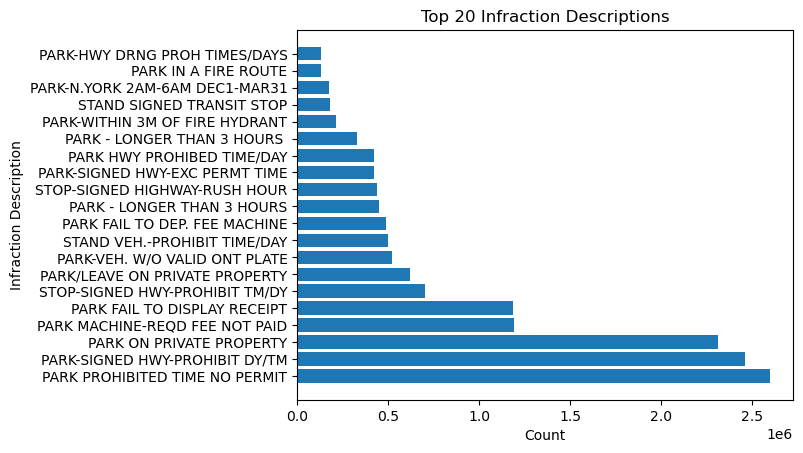

In [70]:
### visualizing the top 20 infrasction description

plt.barh(top_20['infraction_description'], top_20['count'])
plt.title('Top 20 Infraction Descriptions')
plt.xlabel('Count')
plt.ylabel('Infraction Description')

# display the chart
plt.show()


In [75]:
### getting the top 20 infraction locations
location_counts = frame['location2'].value_counts()
location_percentages = location_counts / len(frame) * 100
location_df = pd.DataFrame({'location': location_counts.index,
                            'count': location_counts.values,
                            'percentage': location_percentages.values})

location_df = location_df.sort_values(by='count', ascending=False)
location_df.head()

,location,count,percentage
0,2075 BAYVIEW AVE,42323,0.236970
1,20 EDWARD ST,37404,0.209428
2,JAMES ST,22078,0.123616
3,1265 MILITARY TRL,21736,0.121702
4,1 BRIMLEY RD S,20175,0.112961


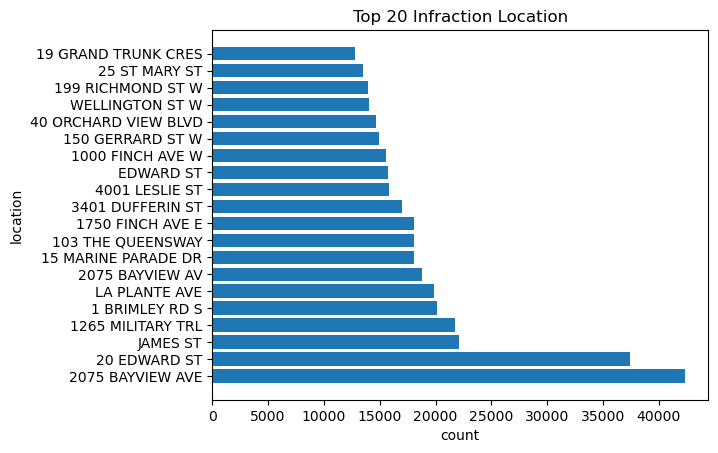

In [77]:
### visualizing the top 20 infraction locations
location_top20 = location_df.head(20)
plt.barh(location_top20['location'], location_top20['count'])
plt.title('Top 20 Infraction Location')
plt.xlabel('count')
plt.ylabel('location')

# display the chart
plt.show()

In [108]:


# Grouping the data by year and infraction description
grouped = frame.groupby(['year', 'infraction_description']).size().reset_index(name='count')

# pivot the data to get each year as a column
pivoted = grouped.pivot(index='infraction_description', columns='year', values='count').reset_index()
pivoted.head(50)

year,infraction_description,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,ANGLE PARK-METERED SPACE-FRONT,6.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN
1,ANGLE PARK-TOO FAR FROM METER,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
2,ANGLE PARK-TOO FAR FROM METER,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
3,FAIL ANGLE PARK/STOP AT 45 DEG,NaN,NaN,NaN,NaN,1.0,39.0,3.0,3.0,12.0,136.0
4,FAIL PARK/STOP PAR CURB LF SID,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,FAIL PARK/STOP PAR RH LTD HWY,354.0,222.0,173.0,42.0,NaN,NaN,NaN,NaN,NaN,NaN
6,FAIL PARK/STOP PAR RT HAND LTD,275.0,235.0,163.0,19.0,NaN,1.0,NaN,NaN,NaN,NaN
7,FAIL PARK/STOP PARA LFT LMT HW,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,FAIL PARK/STOP PARALLEL CURB,26.0,19.0,15.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN
9,FAIL PARK/STOP RH LIMIT OF HWY,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [106]:
year_counts = frame.groupby('year').size().reset_index(name='count')


year_counts.head(15)

,year,count
0,2011,1048575
1,2012,1048575
2,2013,1048575
3,2014,2484983
4,2015,2168493
5,2016,2254761
6,2017,2144225
7,2018,2044288
8,2019,2213939
9,2020,1403663


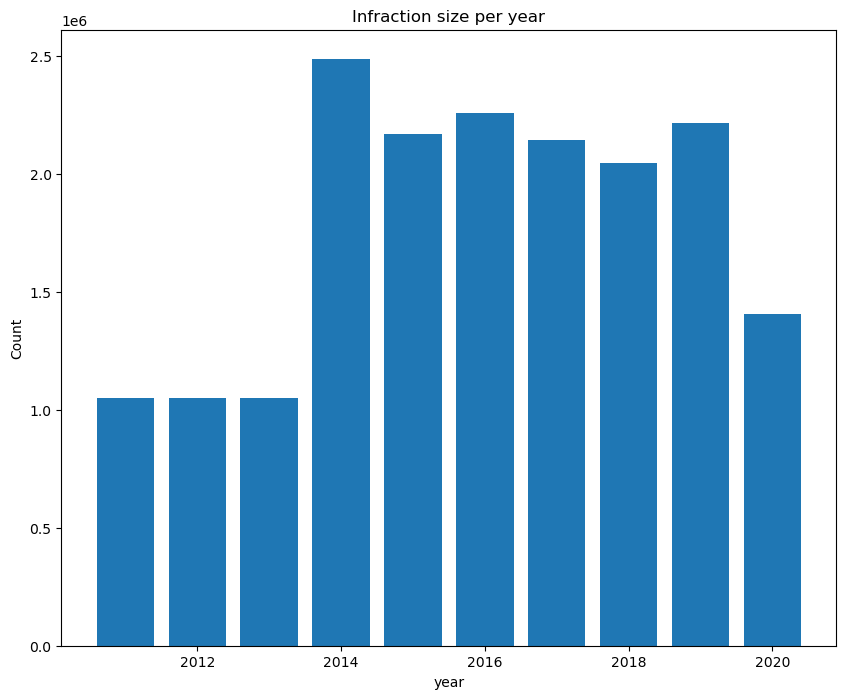

In [90]:
plt.figure(figsize=(10, 8))
plt.bar(year_counts['year'], year_counts['count'])
plt.title('Infraction size per year')
plt.xlabel('year')
plt.ylabel('Count')

# display the chart
plt.show()

In [93]:
# Group the data by year and infraction description
grouped_month = frame.groupby(['year', 'month']).size().reset_index(name='count')

# pivot the data to get each year as a column
pivoted_month = grouped_month.pivot(index='month', columns='year', values='count').reset_index()
pivoted_month.head(12)

year,month,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,April,239634.0,228756.0,226021.0,217684.0,177631.0,209731.0,177258.0,165826.0,188258.0,17979.0
1,August,NaN,NaN,NaN,204807.0,179442.0,187737.0,190112.0,170214.0,190099.0,135285.0
2,December,NaN,NaN,NaN,186503.0,181692.0,156826.0,140866.0,167111.0,172671.0,111786.0
3,February,200457.0,225932.0,181477.0,184415.0,143634.0,174792.0,169898.0,146038.0,140191.0,168063.0
4,January,205718.0,229775.0,206505.0,187213.0,178851.0,186894.0,192230.0,154625.0,160463.0,190022.0
5,July,NaN,NaN,NaN,209305.0,197849.0,184961.0,181269.0,167364.0,196548.0,102692.0
6,June,NaN,NaN,NaN,222711.0,183359.0,193293.0,188867.0,172458.0,186244.0,37877.0
7,March,255465.0,258448.0,223007.0,226228.0,190925.0,188953.0,194264.0,181352.0,193198.0,130390.0
8,May,147301.0,105664.0,211565.0,226024.0,184904.0,205594.0,190074.0,180266.0,193634.0,25493.0
9,November,NaN,NaN,NaN,202792.0,182195.0,186174.0,165201.0,178131.0,192054.0,149295.0


In [104]:
### calculating total infractions per month and the percentage

month_counts = frame['month'].value_counts()
month_percentages = month_counts  / len(frame) * 100
month_df = pd.DataFrame({'Month': month_counts.index,
                            'count': month_counts.values,
                            'percentage': month_percentages.values})

month_df = month_df.sort_values(by='count', ascending=False)
month_df.head(12)




,Month,count,percentage
0,March,2042230,11.434609
1,January,1892296,10.595117
2,April,1848778,10.351456
3,February,1734897,9.713827
4,May,1670519,9.353370
5,October,1330637,7.450343
6,September,1284930,7.194426
7,August,1257696,7.041941
8,November,1255842,7.031560
9,July,1239988,6.942792


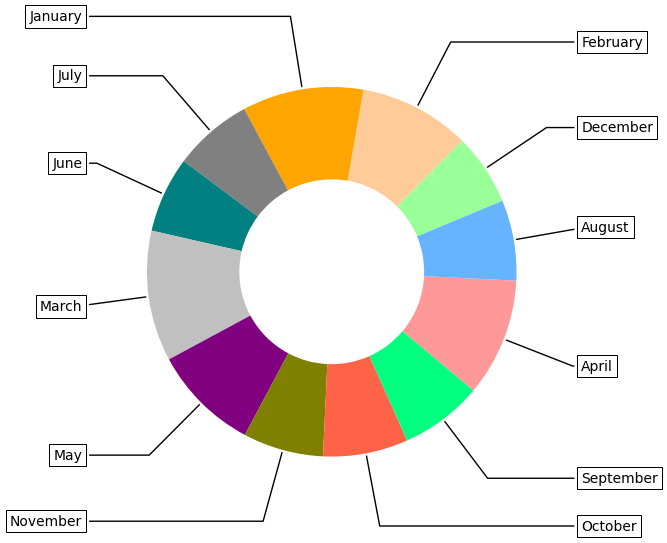

In [102]:
### Visualizing crime count per Month


labels = month_counts['month']
data = month_counts['count']
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#ffa500','#808080','#008080','#c0c0c0','#800080','#808000','#ff6347','#00ff7f']
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(aspect="equal"))

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40, colors=colors)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"), bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(labels[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y), horizontalalignment=horizontalalignment, **kw)


plt.show()

In [111]:
#### Years with the highest fine revenues generated

yearly_sum = frame.groupby('year')['set_fine_amount'].sum().reset_index()


total_sum = yearly_sum['set_fine_amount'].sum()


yearly_sum['Percentage'] = (yearly_sum['set_fine_amount'] / total_sum) * 100


yearly_sum = yearly_sum.sort_values(by='Percentage', ascending=False)


result = yearly_sum[['year', 'set_fine_amount', 'Percentage']].rename(columns={'set_fine_amount': 'Sum of Fine Amount'})

result.head(15)




,year,Sum of Fine Amount,Percentage
5,2016,109675985,13.193009
3,2014,108987340,13.110172
8,2019,108424170,13.042427
6,2017,106199960,12.774875
7,2018,100206695,12.053941
4,2015,99872770,12.013773
9,2020,70555350,8.487158
0,2011,42620470,5.126849
2,2013,42489570,5.111103
1,2012,42286635,5.086692


In [113]:

### months with the highest fine revenue generaed
month_sum = frame.groupby('month')['set_fine_amount'].sum().reset_index()


totalmonth_sum = month_sum['set_fine_amount'].sum()


month_sum['Percentage'] = (month_sum['set_fine_amount'] / totalmonth_sum) * 100


month_sum = month_sum.sort_values(by='Percentage', ascending=False)


month_result = month_sum[['month', 'set_fine_amount', 'Percentage']].rename(columns={'set_fine_amount': 'Sum of Fine Amount'})

month_result .head(15)


,month,Sum of Fine Amount,Percentage
7,March,91613090,11.020210
4,January,85859265,10.328078
0,April,82923270,9.974904
3,February,78691645,9.465879
8,May,76045220,9.147538
10,October,63372030,7.623071
11,September,61253120,7.368185
1,August,60330860,7.257246
9,November,60271750,7.250136
5,July,59706725,7.182168


In [115]:
###### showing the highest percentage fine amount given to offenders

finecounts = frame['set_fine_amount'].value_counts()
fine_percentages = finecounts  / len(frame) * 100
fine_df = pd.DataFrame({'Fine Amount': finecounts.index,
                            'count': finecounts.values,
                            'percentage': fine_percentages.values})

fine_df = fine_df.sort_values(by='count', ascending=False)
fine_df.head(20)

,Fine Amount,count,percentage
0,30,9182149,51.411587
1,40,3006595,16.834166
2,50,1738008,9.731246
3,60,1656978,9.277552
4,15,838831,4.696682
5,150,673131,3.768914
6,100,501709,2.809109
7,250,132360,0.741094
8,450,110104,0.616481
9,90,8153,0.045649
